In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier


In [2]:
resumedf = pd.read_csv('UpdatedResumeDataset.csv', encoding = 'utf-8')
resumedf.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [3]:
resumedf.Resume.head()

0    Skills * Programming Languages: Python (pandas...
1    Education Details \r\nMay 2013 to May 2017 B.E...
2    Areas of Interest Deep Learning, Control Syste...
3    Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4    Education Details \r\n MCA   YMCAUST,  Faridab...
Name: Resume, dtype: object

In [4]:
resumedf['cleaned_resume'] = ''
resumedf.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",


In [5]:
resumedf['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [6]:
resumedf['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Mechanical Engineer          40
Sales                        40
ETL Developer                40
Operations Manager           40
Blockchain                   40
Data Science                 40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
DotNet Developer             28
Business Analyst             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: Category, dtype: int64

In [7]:
resumedf.shape

(962, 3)

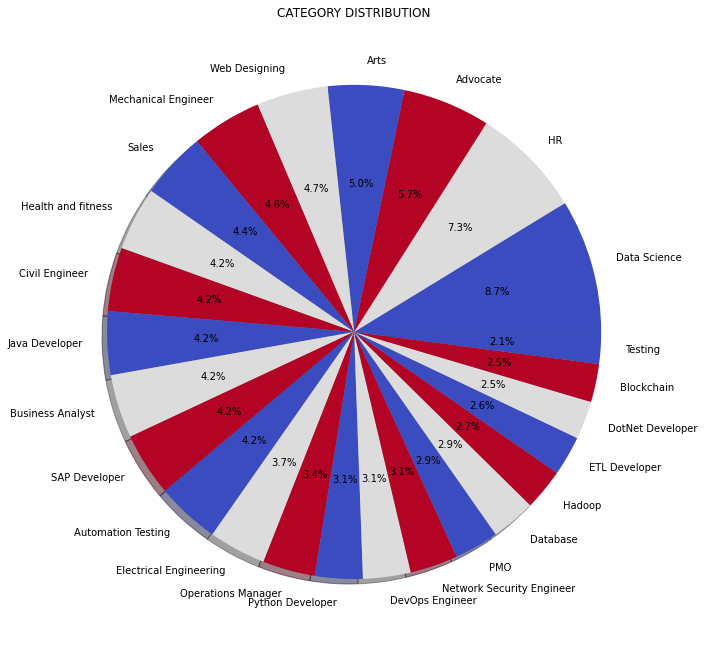

In [8]:
from matplotlib.gridspec import GridSpec

targetcount = resumedf['Category'].value_counts()
target_label = resumedf['Category'].unique()

cmap = plt.get_cmap('coolwarm')
color = [cmap(i) for i in np.linspace(0, 1, 3)]

plt.figure(1, figsize = (25, 25))
the_grid = GridSpec(2, 2)

plt.subplot(the_grid[0,1], aspect =1 , title = 'CATEGORY DISTRIBUTION')


pie = plt.pie(targetcount, labels = target_label, autopct = '%1.1f%%', shadow = True, colors = color)

plt.show()

In [ ]:
# To clean the text and sentences

In [9]:
import re

def cleanresume(resume_text):
   
    resume_text = re.sub('http\S+|s*', '', resume_text) #To remove any form of web links
    resume_text = re.sub('RT|cc', '', resume_text)
    resume_text = re.sub('#\S+', '', resume_text) #To remove all hash tags
    resume_text = re.sub('@\S+', '', resume_text) # To remove all tags and email address
    resume_text = re.sub('[%s]' % re.escape("""!"#$&'()*+,_./:;<=>?@[\]^-`{|}~"""), '', resume_text)
    resume_text = re.sub(r'[^\x00-\x7f]', r'', resume_text)
    resume_text = re.sub('\s+', ' ', resume_text)
    
    return resume_text

In [10]:
resumedf['cleaned_resume'] = resumedf.Resume.apply(lambda x: cleanresume(x))

In [11]:
resumedf.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skill Programming Language Python panda numpy ...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Detail May 2013 to May 2017 BE UITRG...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Area of Interet Deep Learning Control Sytem De...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skill R Python SAP HANA Tableau SAP HANA SQL S...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Detail MCA YMCAUST Faridabad Haryana...


[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


<FreqDist with 2768 samples and 33330 outcomes>
[('Detail', 494), ('Exprience', 446), ('month', 380), ('company', 326), ('decription', 310), ('1', 290), ('year', 254), ('Skill', 230), ('January', 216), ('Le', 204), ('project', 200), ('Data', 196), ('data', 192), ('Maharahtra', 166), ('6', 160), ('Science', 158), ('Python', 148), ('College', 140), ('The', 126), ('like', 126), ('Education', 122), ('Learning', 116), ('I', 116), ('India', 114), ('Univerity', 112), ('Web', 106), ('Machine', 104), ('uing', 104), ('monthCompany', 102), ('Art', 102), ('time', 100), ('Project', 100), ('Role', 92), ('application', 92), ('Mumbai', 90), ('Pune', 90), ('learning', 86), ('Sytem', 86), ('SQL', 84), ('requirement', 80), ('Engineering', 78), ('day', 78), ('24', 76), ('variou', 76), ('Software', 76), ('Reponibilitie', 76), ('Nagpur', 76), ('development', 74), ('Management', 74), ('Technologie', 72)]


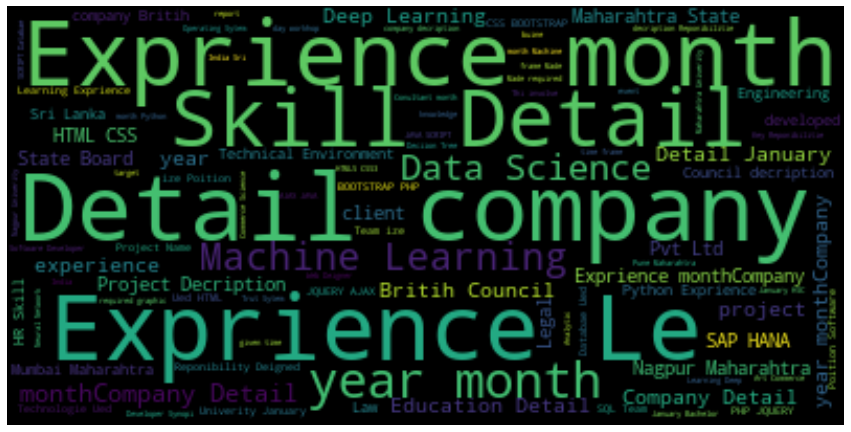

In [12]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords

import string
from wordcloud import WordCloud

OneSetOfStopWords = set(stopwords.words('english')+['``', "''"])
totalWords =[]
Sentences = resumedf['Resume'].values

cleanedSentences = ""

for i in range(0, 160):
    cleanedText = cleanresume(Sentences[i])
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    
    for word in requiredWords:
        if word not in OneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)

wordfreqdist = nltk.FreqDist(totalWords)
print(wordfreqdist)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

# mostcommon = nltk.freqDist(total_words).most_common(50)
# print(mostcommon)

wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize =(15, 15))
plt.imshow(wc,  interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [13]:
# import nltk
# from nltk.corpus import stopwords
# nltk.download('stopwords')
# nltk.download('punkt')
# import string
# from wordcloud import WordCloud

# OneSetOfStopWords = set(stopwords.words('english')+["```", "''"])
# totalWords = []
# cleanedSentences = ""
# Sentences = resumedf['Resume'].values

# for i in range(0, 160):
#     cleanedtext = cleanresume(Sentences[i])
#     cleanedSentences += cleanedtext
#     requiredWords =  word_tokenize(cleanedtext)
#     for word in cleanedSentences:
#         if word not in OneOfSetofStopwords and word not in string.punctuation:
            
#             totalWords.append(word)

# mostfreqdict = freqDict(totalWords)
# mostcommon = mostfreqdict.most_common(50)

# print(mostcommon)

# wc = WordCloud().generate(cleanedSentences)

# plt.figure(figsize =(12, 15))
# plt.imshow(wc, interpolation = 'bilinear')
# plt.axis('off')
# plt.show()

In [ ]:
#Covert the words to categorical values

In [14]:
from sklearn.preprocessing import LabelEncoder

var_mode = ['Category']

label = LabelEncoder()

for i in var_mode:
    resumedf[i] = label.fit_transform(resumedf[i])

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

text = resumedf['cleaned_resume'].values
target = resumedf['Category'].values


word_vectorizer = TfidfVectorizer(sublinear_tf = True,
                                stop_words = 'english',
                                max_features = 1500)

word_vectorizer.fit(text)

wordFeatures = word_vectorizer.transform(text)


X_train, X_test, y_train, y_test = train_test_split(wordFeatures, target, random_state = 0, test_size = 0.2)

In [16]:
print(X_train.shape)
print(X_test.shape)

(769, 1500)
(193, 1500)


In [17]:
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
yhat = clf.predict(X_test)

print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on testing set: {:.2f}'.format(clf.score(X_test, y_test)))

print("\nClassification report  for Claassifier %s:\n%s\n"% (clf, metrics.classification_report(y_test, yhat)))

Accuracy of KNeighbors Classifier on training set: 0.99
Accuracy of KNeighbors Classifier on testing set: 0.99

Classification report  for Claassifier OneVsRestClassifier(estimator=KNeighborsClassifier()):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       0.80      0.80      0.80         5
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         7
           8       1.00      0.91      0.95        11
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         8
          11       0.90      1.00      0.95         9
          12       1.00      1.00      1.00         5
          13       1.00      1.00    